# Meta-analysis using Python
We use the data extracted from Table 43.1 on page 455

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mean = np.array([2.5, 1.4, 1.1, 1.2, .8, .85, 1.05, 1.2])
lower= np.array([1.7, .8, .8, .85, .5, .4, .6, .9])
upper= np.array([4.8, 2.2, 1.8, 1.9, 1.4, 1.6, 2, 1.6])
W = (upper-lower)/2

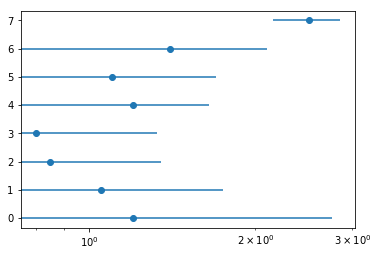

In [3]:
plt.errorbar(np.flip(mean), y=np.arange(len(mean)), xerr=W, fmt='o')
plt.xscale('log')

Doesn't look optimal, to be enhanced further with python, or waiting for a library dedicated to meta-analysis. For the time better to stick to R.

In [4]:
from statsmodels.stats.contingency_tables import StratifiedTable

In [46]:
data=pd.read_csv("../data/catheter.csv", index_col=0, usecols=[1,2,3,4,5])

In [47]:
data

,n.trt,n.ctrl,col.trt,col.ctrl
Name,,,,
Ciresi,124,127,15.0,21.0
George,44,35,10.0,25.0
Hannan,68,60,22.0,22.0
Heard,151,157,60.0,82.0
vanHeerden,28,26,4.0,10.0
Maki,208,195,28.0,47.0
Bach(a),14,12,0.0,4.0
Ramsay,199,189,45.0,63.0
Appavu,12,7,1.0,1.0


In [52]:
data.iloc[[6,5,3,12,4,11,1,8,10,2]]

,n.trt,n.ctrl,col.trt,col.ctrl
Name,,,,
Bach(a),14,12,0.0,4.0
Maki,208,195,28.0,47.0
Heard,151,157,60.0,82.0
Tennenberg,137,145,8.0,32.0
vanHeerden,28,26,4.0,10.0
Bach(b),116,117,2.0,16.0
George,44,35,10.0,25.0
Appavu,12,7,1.0,1.0
Collins,98,139,2.0,25.0


In [56]:
mat = np.asarray(data.iloc[[6,5,3,12,4,11,1,8,10,2]])
tables = [np.reshape(x.tolist(), (2, 2)) for x in mat]

In [57]:
mat

array([[ 14.,  12.,   0.,   4.],
       [208., 195.,  28.,  47.],
       [151., 157.,  60.,  82.],
       [137., 145.,   8.,  32.],
       [ 28.,  26.,   4.,  10.],
       [116., 117.,   2.,  16.],
       [ 44.,  35.,  10.,  25.],
       [ 12.,   7.,   1.,   1.],
       [ 98., 139.,   2.,  25.],
       [ 68.,  60.,  22.,  22.]])

In [58]:
st = sm.stats.StratifiedTable(tables)
print(st.summary())

                   Estimate   LCB    UCB 
-----------------------------------------
Pooled odds           2.041   1.612 2.583
Pooled log odds       0.713   0.478 0.949
Pooled risk ratio     1.512              
                                         
                 Statistic P-value 
-----------------------------------
Test of OR=1        35.866   0.000 
Test constant OR    21.523   0.011 
                       
-----------------------
Number of tables   10  
Min n              21  
Max n             478  
Avg n             217  
Total n          2170  
-----------------------
